Nadia Morgen - Project 3, Notebook 2:  EDA

# Notebook 2:  Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


In [21]:
# Read in data
df = pd.read_csv('data_finally_clean.csv')
df2 = pd.read_csv('df2_clean.csv')

In [3]:
# Verify it's all there
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,title,selftext,created_utc,title_clean,selftext_clean,clean_lemon_tokens,cln_lmn_tok_title,disney_y
0,0,0,0,anybody have this 2099 expiration issue with n...,NaN,1631369894,"['[', ""'anybody"", ""'"", ',', ""'have"", ""'"", ',',...","['[', ']']",[],"['anybody', 'have', 'this', '2099', 'expiratio...",1
1,1,1,1,"i went to wdw back in april, here are some pic...",NaN,1631367728,"['[', ""'"", 'i', ""'"", ',', ""'went"", ""'"", ',', ""...","['[', ']']",[],"['i', 'went', 'to', 'back', 'in', 'april', ','...",1
2,2,2,2,full walkthrough of villain's grove at opening...,NaN,1631339851,"['[', ""'full"", ""'"", ',', ""'walkthrough"", ""'"", ...","['[', ']']",[],"['full', 'walkthrough', 'of', 'villain', ""'s"",...",1
3,3,3,3,one of my favorite pieces of park merchandise ...,NaN,1631339788,"['[', ""'one"", ""'"", ',', ""'of"", ""'"", ',', ""'my""...","['[', ']']",[],"['one', 'of', 'my', 'favorite', 'piece', 'of',...",1
4,4,4,4,first time at avengers campus and rode incredi...,NaN,1631337412,"['[', ""'first"", ""'"", ',', ""'time"", ""'"", ',', ""...","['[', ']']",[],"['first', 'time', 'at', 'avenger', 'campus', '...",1
...,...,...,...,...,...,...,...,...,...,...,...
10172,10172,10172,10172,ideas for family of visitor who is at the end ...,a very close relative of my wife will be visit...,1427773590,"['[', ""'ideas"", ""'"", ',', ""'for"", ""'"", ',', ""'...","['[', ""'"", 'a', ""'"", ',', ""'very"", ""'"", ',', ""...","['a', 'very', 'close', 'relative', 'of', 'my',...","['idea', 'for', 'family', 'of', 'visitor', 'wh...",0
10173,10173,10173,10173,parking question,"okay, so i just got a preferred pass for unive...",1427760214,"['[', ""'parking"", ""'"", ',', ""'question"", ""'"", ...","['[', ""'okay"", ""'"", ',', ""'"", ',', ""'"", ',', ""...","['okay', ',', 'so', 'i', 'just', 'got', 'a', '...","['parking', 'question']",0
10174,10174,10174,10174,universal studios hollywood newbie,i've only ever been to ioa and universal studi...,1427579502,"['[', ""'newbie"", ""'"", ']']","['[', ""'"", 'i', ""'"", ',', '``', ""'ve"", ""''"", '...","['i', ""'ve"", 'only', 'ever', 'been', 'to', 'io...",['newbie'],0
10175,10175,10175,10175,if you guys had to bring back 1 former attract...,i would bring back either jaws or nickelodeon ...,1427459882,"['[', ""'if"", ""'"", ',', ""'you"", ""'"", ',', ""'guy...","['[', ""'"", 'i', ""'"", ',', ""'would"", ""'"", ',', ...","['i', 'would', 'bring', 'back', 'either', 'jaw...","['if', 'you', 'guy', 'had', 'to', 'bring', 'ba...",0


In [4]:
# Drop duplicate dummy column
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0.1.1'], inplace=True)

In [36]:
df['selftext_word_count'] = df['clean_lemon_tokens'].str.count(',') + 1
df2['selftext_word_count'] = df2['clean_lemon_tokens'].str.count(',') + 1

In [37]:
df['title_word_count'] = df['cln_lmn_tok_title'].str.count(',') + 1
df2['title_word_count'] = df2['cln_lmn_tok_title'].str.count(',') + 1

In [7]:
# Verify it worked correctly
df

,title,selftext,created_utc,title_clean,selftext_clean,clean_lemon_tokens,cln_lmn_tok_title,disney_y,selftext_word_count,title_word_count
0,anybody have this 2099 expiration issue with n...,NaN,1631369894,"['[', ""'anybody"", ""'"", ',', ""'have"", ""'"", ',',...","['[', ']']",[],"['anybody', 'have', 'this', '2099', 'expiratio...",1,1,43
1,"i went to wdw back in april, here are some pic...",NaN,1631367728,"['[', ""'"", 'i', ""'"", ',', ""'went"", ""'"", ',', ""...","['[', ']']",[],"['i', 'went', 'to', 'back', 'in', 'april', ','...",1,1,17
2,full walkthrough of villain's grove at opening...,NaN,1631339851,"['[', ""'full"", ""'"", ',', ""'walkthrough"", ""'"", ...","['[', ']']",[],"['full', 'walkthrough', 'of', 'villain', ""'s"",...",1,1,33
3,one of my favorite pieces of park merchandise ...,NaN,1631339788,"['[', ""'one"", ""'"", ',', ""'of"", ""'"", ',', ""'my""...","['[', ']']",[],"['one', 'of', 'my', 'favorite', 'piece', 'of',...",1,1,40
4,first time at avengers campus and rode incredi...,NaN,1631337412,"['[', ""'first"", ""'"", ',', ""'time"", ""'"", ',', ""...","['[', ']']",[],"['first', 'time', 'at', 'avenger', 'campus', '...",1,1,13
...,...,...,...,...,...,...,...,...,...,...
10172,ideas for family of visitor who is at the end ...,a very close relative of my wife will be visit...,1427773590,"['[', ""'ideas"", ""'"", ',', ""'for"", ""'"", ',', ""'...","['[', ""'"", 'a', ""'"", ',', ""'very"", ""'"", ',', ""...","['a', 'very', 'close', 'relative', 'of', 'my',...","['idea', 'for', 'family', 'of', 'visitor', 'wh...",0,189,12
10173,parking question,"okay, so i just got a preferred pass for unive...",1427760214,"['[', ""'parking"", ""'"", ',', ""'question"", ""'"", ...","['[', ""'okay"", ""'"", ',', ""'"", ',', ""'"", ',', ""...","['okay', ',', 'so', 'i', 'just', 'got', 'a', '...","['parking', 'question']",0,204,2
10174,universal studios hollywood newbie,i've only ever been to ioa and universal studi...,1427579502,"['[', ""'newbie"", ""'"", ']']","['[', ""'"", 'i', ""'"", ',', '``', ""'ve"", ""''"", '...","['i', ""'ve"", 'only', 'ever', 'been', 'to', 'io...",['newbie'],0,54,1
10175,if you guys had to bring back 1 former attract...,i would bring back either jaws or nickelodeon ...,1427459882,"['[', ""'if"", ""'"", ',', ""'you"", ""'"", ',', ""'guy...","['[', ""'"", 'i', ""'"", ',', ""'would"", ""'"", ',', ...","['i', 'would', 'bring', 'back', 'either', 'jaw...","['if', 'you', 'guy', 'had', 'to', 'bring', 'ba...",0,10,21


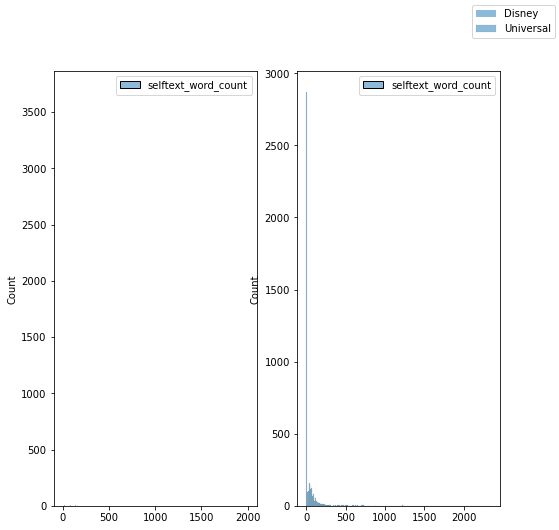

In [32]:
# Plot word count by subreddit, using cleaned, lemmatized selftext (clean_lemon_tokens)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
Disney = df.loc[df['disney_y'] == 1]
Universal = df.loc[df['disney_y'] == 0]

sns.histplot(Disney[['selftext_word_count']], ax=ax[0])
sns.histplot(Universal[['selftext_word_count']], ax=ax[1])

fig.legend(labels=['Disney','Universal'])
plt.show()

fig.suptitle('Word Count Distributions', fontsize=20);

Clearly, there is a lot of missing selftext data that didn't appear in my df.isna().sum() inquiry when I cleaned the data.  Time to iterate and assess the damage.

In [11]:
# Assess issue with missing data

g = df.groupby('disney_y')
-g.count().rsub(g.size(), axis=0)

# https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features

,title,selftext,created_utc,title_clean,selftext_clean,clean_lemon_tokens,cln_lmn_tok_title,selftext_word_count,title_word_count
disney_y,,,,,,,,,
0,0,-2586,0,0,0,0,0,0,0
1,0,-3680,0,0,0,0,0,0,0


The results indicate that there are likely a lot of images.  Unfortunately, there are significantly more images for Disney than for Universal.  Due to time constraints, I'll drop the missing values when I analyze selftext, but not when I analyze titles.  In the new dataframe (df6), Disney will have 1,413 rows and Universal will have 2,498.  This is not ideal, but it's the data I was able to get in the time allocated and given the random api barriers I faced.

I cleaned up the data futher in Notebook 1 and created df2; I deleted all rows with selftext = NaN.

In [33]:
df.shape

(10177, 13)

In [34]:
df2.shape

(3911, 10)

In [15]:
df.groupby('disney_y').sum()

,created_utc,selftext_word_count,title_word_count
disney_y,,,
0,7785417136696,328730,55870
1,8146984794481,110807,61829


In [16]:
title_word_count = df.groupby(['disney_y'])
title_word_count.mean()

,created_utc,selftext_word_count,title_word_count
disney_y,,,
0,1.531357e+09,64.659717,10.989378
1,1.599644e+09,21.756725,12.139996


In [17]:
title_word_count = df.groupby(['disney_y'])
title_word_count.median()

,created_utc,selftext_word_count,title_word_count
disney_y,,,
0,1.533376e+09,1.0,9.0
1,1.600349e+09,1.0,9.0


In [23]:
selftext_word_count = df2.groupby(['disney_y'])
selftext_word_count.mean()


,Unnamed: 0,Unnamed: 0.1,created_utc
disney_y,,,
0,7980.224980,7980.224980,1.516730e+09
1,2347.039632,2347.039632,1.602254e+09


In [24]:
selftext_word_count = df2.groupby(['disney_y'])
selftext_word_count.median()

,Unnamed: 0,Unnamed: 0.1,created_utc
disney_y,,,
0,8260.5,8260.5,1.501443e+09
1,2209.0,2209.0,1.605283e+09


Even after dropping the rows with missing selftext, universal's selftext word count is nearly 3 times higher than Disney's, even though Universal only has twice as many posts.  My guess is that people post more images on the disneyparks subreddit than on the universalstudios subreddit.

That said, on average, disneyparks redditers post longer titles.  This might be because they post more images.  Alternatively, disneyparks redditers might have fewer people familiar with reddit, so they don't use the selftext field as often.  This could be something to research further (with data I don't have).  However, the median title length for subreditters in both groups was the same.  This indicates that enough long-winded title writers pulled up disneyparks' mean.

* Note that this is the "cleaned subtext" word count.

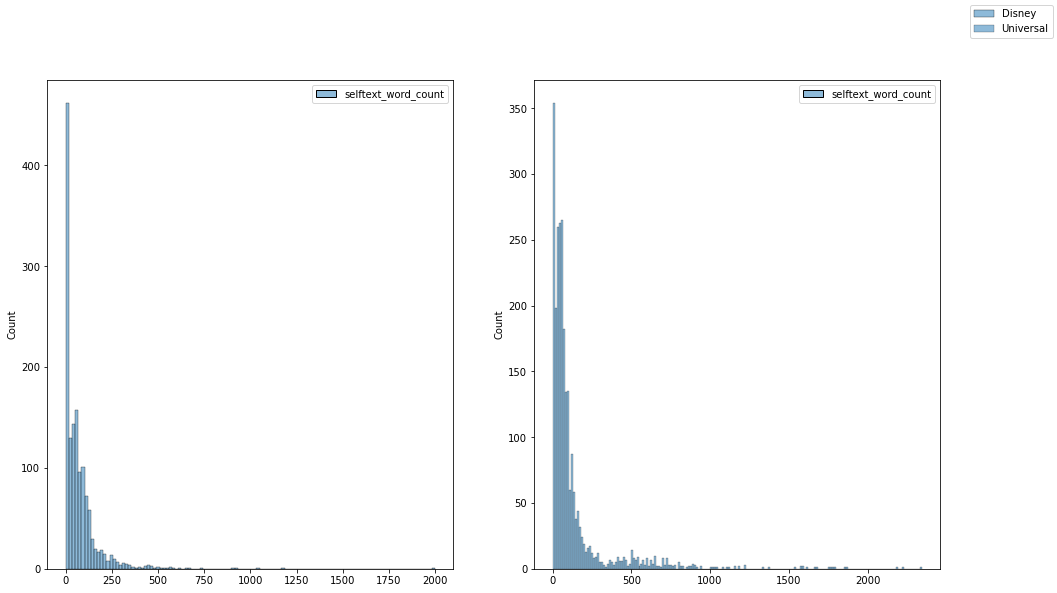

In [38]:
# Replotting word count after dropping missing rows
# Plot word count by subreddit

fig, ax = plt.subplots(1, 2, figsize=(16, 9))
Disney = df2.loc[df2['disney_y'] == 1]
Universal = df2.loc[df2['disney_y'] == 0]

sns.histplot(Disney[['selftext_word_count']], ax=ax[0])
sns.histplot(Universal[['selftext_word_count']], ax=ax[1])

fig.legend(labels=['Disney','Universal'])
plt.show()

fig.suptitle('Word Count Distributions', fontsize=20);

Since Universal has over 1,000 more observations than Disney, I cannot comment on the raw frequencies here.  But I can comment on the distributions.  Both have hundreds of 1 or 2 word selftexts.  As indicated by the difference in means, there is more right skew on the universalstudios plot than on the disneyparks plot.  This could help the nlp modeling tools differentiate between the two subreddits.

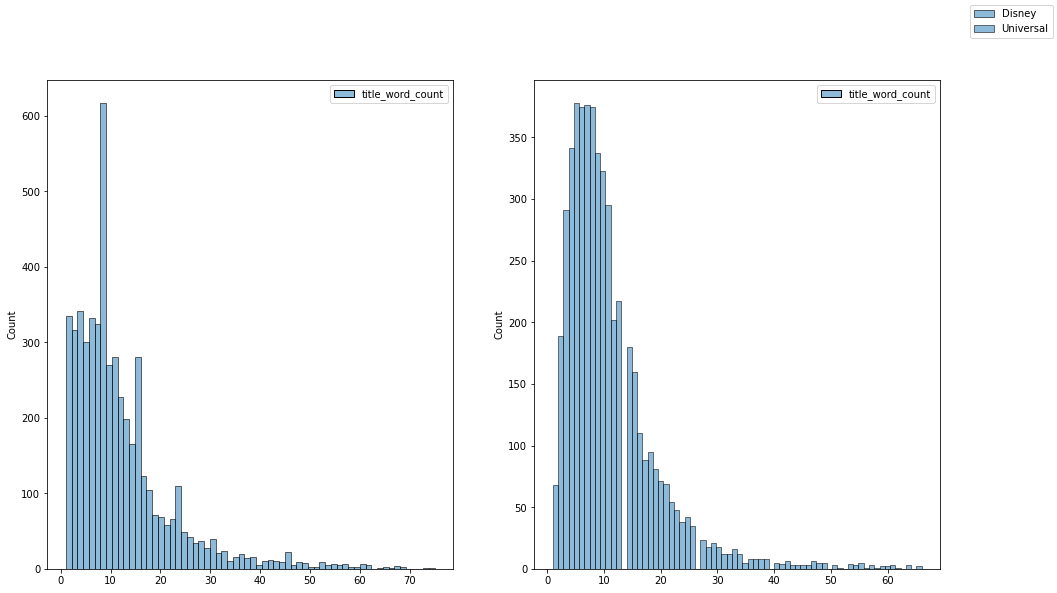

In [39]:
# Title word count by subreddit - using title_wordcount (which is cleaned, tokenized, and lemmatized)

fig, ax = plt.subplots(1, 2, figsize=(16, 9))
Disney = df.loc[df['disney_y'] == 1]
Universal = df.loc[df['disney_y'] == 0]

sns.histplot(Disney[['title_word_count']], ax=ax[0])
sns.histplot(Universal[['title_word_count']], ax=ax[1])

fig.legend(labels=['Disney','Universal'])
plt.show()

fig.suptitle('Word Count Distributions', fontsize=20);

It's important to note that the y-axis for Disney ends around 650, while the y-axis for Universal ends around 400.  

In [ ]:
cv = CountVectorizer()

In [41]:
# Show the 10 most common words

diz = df2[df2['disney_y'] == 1]
uni = df2[df2['disney_y'] == 0]

cv = CountVectorizer(ngram_range=(1,2))
diz_vect = cv.fit_transform(diz['selftext_clean'])
diz_vect_df2 = pd.DataFrame(diz_vect.todense(), columns=cv.get_feature_names())

cv = CountVectorizer(ngram_range=(1,2))
uni_vect = cv.fit_transform(uni['selftext_clean'])
uni_vect_df2 = pd.DataFrame(uni_vect.todense(), columns=cv.get_feature_names())

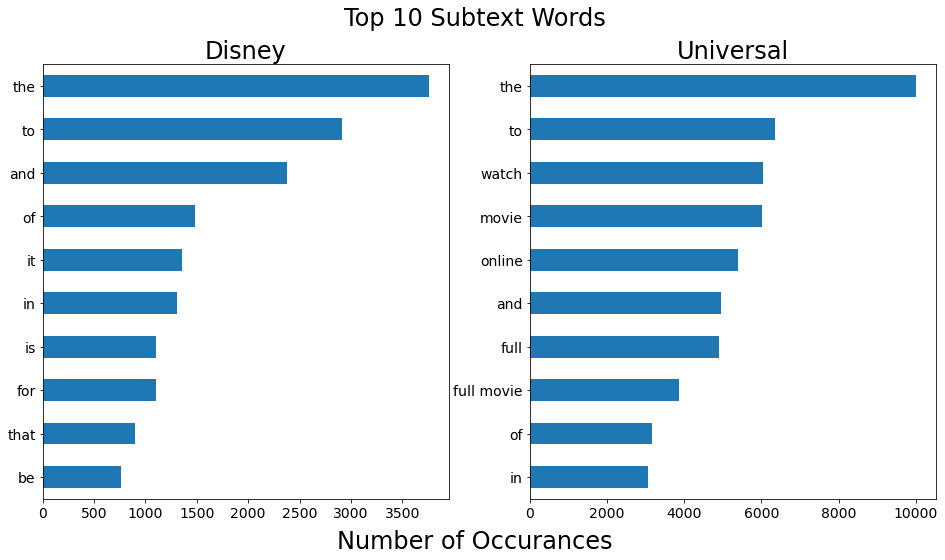

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
diz_vect_df2.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14);
uni_vect_df2.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14);

ax[0].set_title('Disney', fontsize=24)
ax[1].set_title('Universal', fontsize=24)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Subtext Words', fontsize=24)
fig.text(.5, .04, 'Number of Occurances', ha='center', fontsize=24);

I hesitate to eliminate stop words, partially because of technical issues (for example, it was removing all 'i's from the post, not just the word I).  I also thought they might provide needed context.  But it's clear that the stop words are only preventing real analysis, so I'm iterating and removing them.

I created a work-around to the technical issue.  I filtered out my customized list of stop words before I tokenized and lemmatized.  Later, I used CountVectorizer to remove the standard English stop words.

In [43]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,2))
diz_vect = cv.fit_transform(diz['selftext_clean'])
diz_vect_df2 = pd.DataFrame(diz_vect.todense(), columns=cv.get_feature_names())

cv = CountVectorizer(stop_words='english', ngram_range=(1,2))
uni_vect = cv.fit_transform(uni['selftext_clean'])
uni_vect_df2 = pd.DataFrame(uni_vect.todense(), columns=cv.get_feature_names())

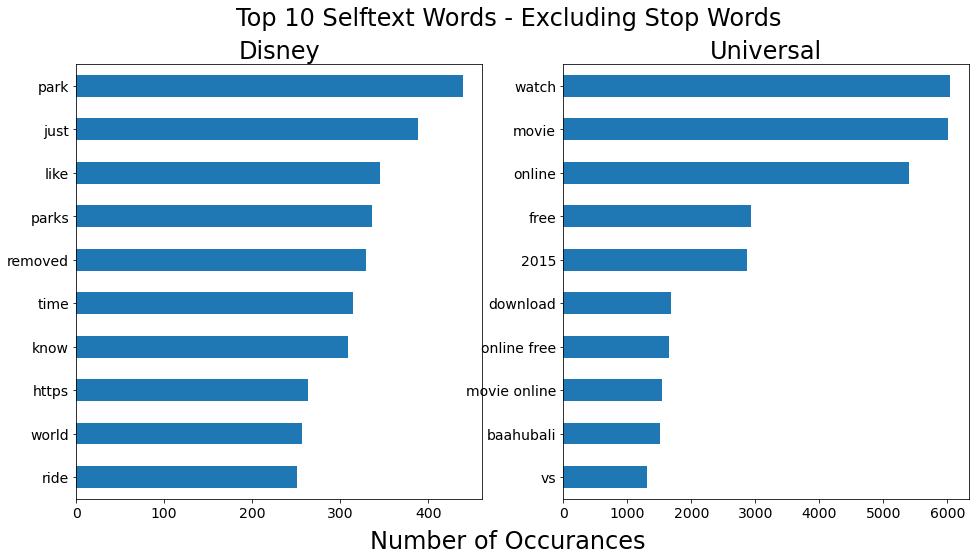

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
diz_vect_df2.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14);
uni_vect_df2.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14);

ax[0].set_title('Disney', fontsize=24)
ax[1].set_title('Universal', fontsize=24)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Selftext Words - Excluding Stop Words', fontsize=24)
fig.text(.5, .04, 'Number of Occurances', ha='center', fontsize=24);

For Universal, a clear brand is surfacing, although it might not be what they want.  The most common title words are related to movies and, for some reason, 2015.  For Disney, tokenization and lemmatization 

The two lists are completely different, whether stop words are included or not.  Universal's posts focus more on movies and watching things, whereas Disney's pertain to polls, parks, and connecting words.  Therefore, I predict that the trianing models will do well in predicting a post's subreddit.

In [ ]:
df2.head(2)

In [ ]:
df2.isna().sum()

In [ ]:
df.head(1)

In [45]:
# Title Analysis - Use full dataframe (n = 10,177 rows, almost 1/2 Disney, 1/2 Universal)

diz = df[df['disney_y'] == 1]
uni = df[df['disney_y'] == 0]

cv = CountVectorizer(ngram_range=(1,2))
diz_vect_title = cv.fit_transform(diz['cln_lmn_tok_title'])
diz_vect_title_df = pd.DataFrame(diz_vect_title.todense(), columns=cv.get_feature_names())

cv = CountVectorizer(ngram_range=(1,2))
uni_vect_title = cv.fit_transform(uni['cln_lmn_tok_title'])
uni_vect_title_df = pd.DataFrame(uni_vect_title.todense(), columns=cv.get_feature_names())

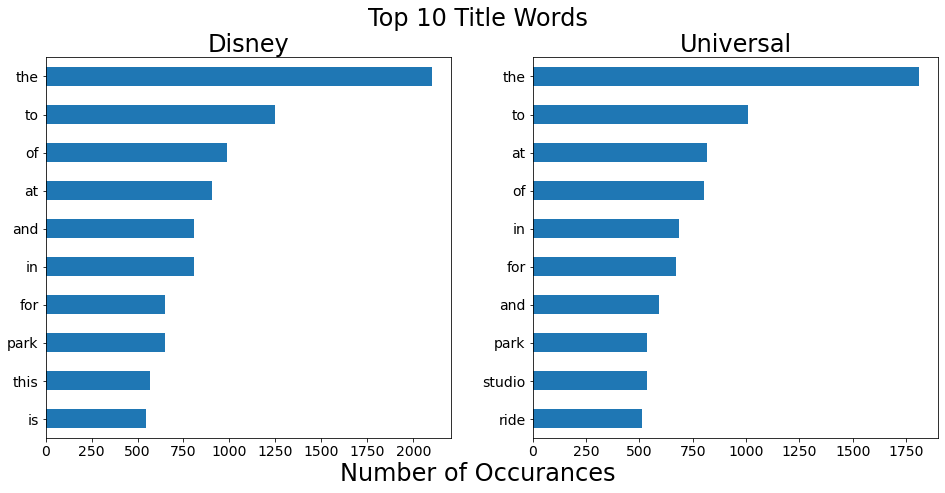

In [46]:
# Plot title_clean data
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
diz_vect_title_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14);
uni_vect_title_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14);

ax[0].set_title('Disney', fontsize=24)
ax[1].set_title('Universal', fontsize=24)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Title Words', fontsize=24)
fig.text(.5, .04, 'Number of Occurances', ha='center', fontsize=24);

There are far more similarities in the titles than in the selftext.  Both lists include "going," "to," "park."

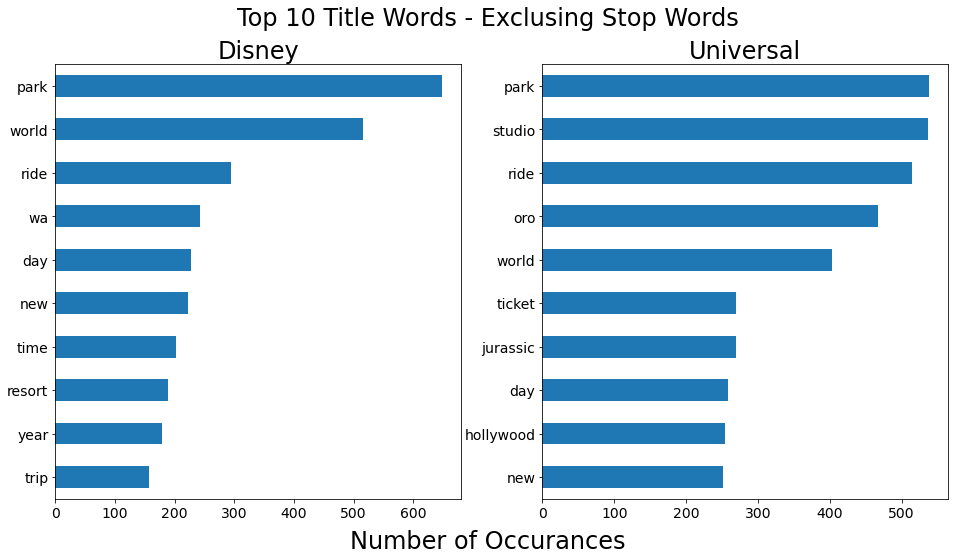

In [47]:
cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2))
diz_vect_title = cv.fit_transform(diz['cln_lmn_tok_title'])
diz_vect_title_df = pd.DataFrame(diz_vect_title.todense(), columns=cv.get_feature_names())

cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2))
uni_vect_title = cv.fit_transform(uni['cln_lmn_tok_title'])
uni_vect_title_df = pd.DataFrame(uni_vect_title.todense(), columns=cv.get_feature_names())

# Plot title_clean data
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
diz_vect_title_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14);
uni_vect_title_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14);

ax[0].set_title('Disney', fontsize=24)
ax[1].set_title('Universal', fontsize=24)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Title Words - Exclusing Stop Words', fontsize=24)
fig.text(.5, .04, 'Number of Occurances', ha='center', fontsize=24);

Eliminating the stop words from the titles led to more topical top words in titles.  However, I am concerned that Disney might have too little data to create a model for title, even though I used the titles from the full dataframe (n = 10,177 rows).

# Magic?

Since magic is Disney's brand, why isn't it coming up in the top 10 most common words?  Are guests not embracing the brand? Or is there an error in my calculations?  I'm going to double-check my magic counts.

Rechecking Magic Counts

In [49]:
# displays True if 'magic' appears in the cleaned, lemmatized title field
df['magic'] = df['cln_lmn_tok_title'].apply(lambda x: 'magic' in x.lower())

In [50]:
# Total number of times "magic" appears in the dataframe
df['magic'].sum()

225

In [51]:
# Multiply by disney_y column to get total number of disneyparks subreddit titles containing "magic"
diz_magic = df['magic'] * df['disney_y']
diz_magic.sum()

180

In [52]:
# Subtract to calculate instances of "magic" in universalstudios' post titles
225 - 180

45

It's possible that "magic" just missed the top 10 words.  Still, since it's Disney's brand, I expected to see it more often.  80% of the "magic" mentions (n = 180) are in disneyparks subreddit titles and 20% (n = 45) are in universalstudios subreddit titles.  Has Universal edged into Disney's brand with Harry Potter?  I did remove all mentions of "Magic Kingdom" in the stop words to prevent easy classification.  But "magic" on its own was not removed by my custom filter.  Entrance and exit gate "cast members" (as both Disney and Universal staff are called) at Disney tell guests to "Have a magical day!"  But does that stick to guests?

In [53]:
df2.to_csv('df2_clean.csv', index=True)
df.to_csv('data_finally_clean.csv', index=True)